In [4]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

### CH4 data 

In [2]:
rootdir = r"C:\Users\Admin\Desktop\Handheld Data"
ffolder = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
      fname =  os.path.join(subdir, file)
      if (('ch4' in fname) or ('CH4' in fname)) and (fname.endswith('MOX.csv')) and ('H2S' not in fname) and ('2nd' not in fname) and ('clean' not in fname) and ('purge' not in fname) and ('Purge' not in fname) and ('Clean' not in fname):
        ffolder.append(fname)

In [3]:
df = pd.concat(map(pd.read_csv, ffolder), ignore_index=True)
df.to_csv('Sharanya_CH4')

In [4]:
data=pd.read_csv(r'Sharanya_CH4')
data.head()

,Unnamed: 0,Time(sec),UH1 Vtg(V),MOX1(Ohms),UH2 Vtg(V),MOX2(Ohms),UH3 Vtg(V),MOX3(Ohms),UH4 Vtg(V),MOX4(Ohms),Ambient Temperature(degC),Ambient Humdity(%%),Ambient Pressure(hPa)
0,0,0.0,0.00,250000.0,0,250000,0.00,220085.5,0.00,250000.0,24.4,49.9,759.9
1,1,0.5,1.88,250000.0,1,250000,2.82,220025.1,2.02,250000.0,24.4,49.9,759.9
2,2,1.0,1.88,250000.0,1,250000,2.82,219958.3,2.02,250000.0,24.4,50.0,759.9
3,3,1.5,1.88,250000.0,1,250000,2.82,219905.7,2.02,250000.0,24.4,50.0,759.9
4,4,2.0,1.88,250000.0,1,250000,2.82,219859.1,2.02,250000.0,24.4,50.0,759.9


<AxesSubplot:>

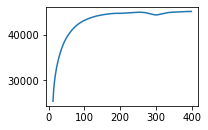

In [23]:
df1=pd.read_csv(r'Sharanya_CH4')
plt.subplot(2, 2, 1)
df1['MOX3(Ohms)'][12:400].plot.line()

In [13]:
#For finding patterns(Equation) of any graph
import numpy as np
from scipy.optimize import curve_fit

# Define the function to fit (in this case, a linear function)
def linear_func(x, a, b):
    return a * x + b

# Define the data points (replace this with your own data)
x_data = np.array(df1['Time(sec)'])
y_data = np.array(df1['MOX3(Ohms)'])

# Use curve_fit to find the best-fitting parameters for the linear function
params, cov = curve_fit(linear_func, x_data, y_data)

# Extract the slope and intercept from the parameters
a, b = params

# Print the equation of the line
print(f"y = {a:.2f} * x + {b:.2f}")


y = 36.08 * x + 39679.22


<AxesSubplot:>

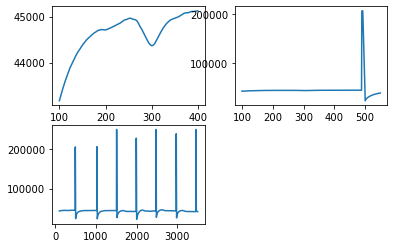

In [6]:
df1=pd.read_csv(r'Sharanya_CH4')
plt.subplot(2, 2, 1)
df1['MOX3(Ohms)'][100:400].plot.line()
plt.subplot(2, 2, 2)
df1['MOX3(Ohms)'][100:550].plot.line()
plt.subplot(2, 2, 3)
df1['MOX3(Ohms)'][100:3500].plot.line()

In [204]:
h = pd.read_csv(r"Sharanya_CH4", header=0, sep=",")
x = h["Time(sec)"]
y = h["MOX3(Ohms)"]
slope_intercept = np.polyfit(x,y,1)
print(slope_intercept)

[  -63.79386193 49972.04747653]


## H2S data

In [19]:
ffolder2 = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
      fname =  os.path.join(subdir, file)
      if (('H2S' in fname) or ('h2s' in fname)) and (fname.endswith('MOX.csv')) and ('NO2' not in file) and ('2nd' not in fname) and ('clean' not in fname) and ('purge' not in fname) and ('Purge' not in fname) and ('Clean' not in fname):
        
          ffolder2.append(fname)

In [20]:
df = pd.concat(map(pd.read_csv, ffolder2), ignore_index=True)
df.to_csv('Sharanya_H2S')

<AxesSubplot:>

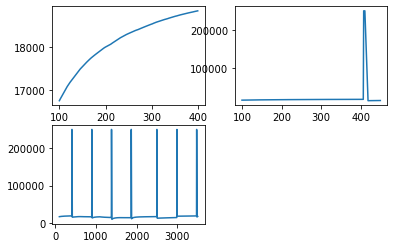

In [21]:
df2=pd.read_csv(r'Sharanya_H2S')
plt.subplot(2, 2, 1)
df2['MOX4(Ohms)'][100:400].plot.line()
plt.subplot(2, 2, 2)
df2['MOX4(Ohms)'][100:450].plot.line()
plt.subplot(2, 2, 3)
df2['MOX4(Ohms)'][100:3500].plot.line()

<AxesSubplot:>

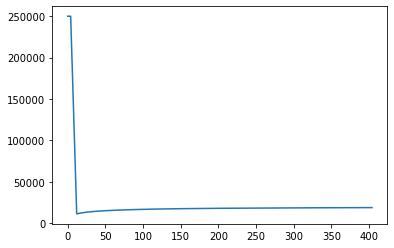

In [12]:
df2=pd.read_csv(r'Sharanya_H2S')
df2['MOX4(Ohms)'][0:405].plot.line()

<AxesSubplot:>

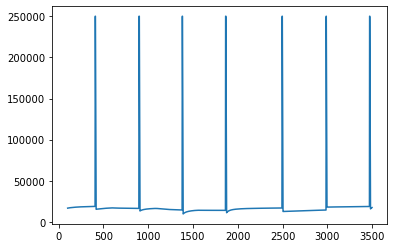

In [14]:
df2=pd.read_csv(r'Sharanya_H2S')
df2['MOX4(Ohms)'][100:3500].plot.line()

In [89]:
hs = pd.read_csv(r"Sharanya_H2S", header=0, sep=",")

x = hs["Time(sec)"]
y = hs["MOX4(Ohms)"]
slope_intercept = np.polyfit(x,y,1)

print(slope_intercept)

[   32.91956815 11411.0030466 ]


## No2 gas 

In [10]:
ffolder3 = []
c= 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
      fname =  os.path.join(subdir, file)
      if (('NO2' in fname) or ('no2' in fname)) and (fname.endswith('MOX.csv')) and ('SO2' not in file) and ('2nd' not in fname) and ('clean' not in fname) and ('purge' not in fname) and ('Purge' not in fname) and ('Clean' not in fname):
        ffolder3.append(fname)

In [11]:
df = pd.concat(map(pd.read_csv, ffolder3), ignore_index=True)
df.to_csv('Sharanya_NO2')

<AxesSubplot:>

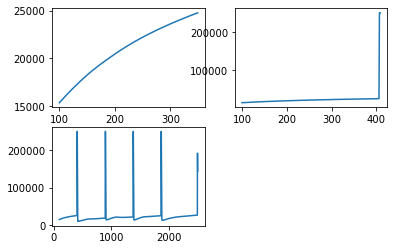

In [18]:
df3=pd.read_csv(r'Sharanya_NO2')
plt.subplot(2, 2, 1)
df3['MOX1(Ohms)'][100:350].plot.line()
plt.subplot(2, 2, 2)
df3['MOX1(Ohms)'][100:410].plot.line()
plt.subplot(2, 2, 3)
df3['MOX1(Ohms)'][100:2500].plot.line()


<AxesSubplot:>

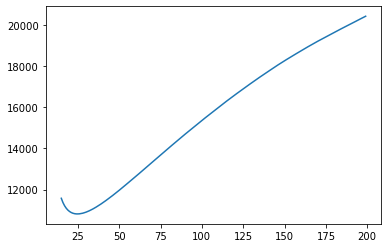

In [80]:
df3=pd.read_csv(r'Sharanya_NO2')
df3['MOX1(Ohms)'][15:200].plot.line()

<AxesSubplot:>

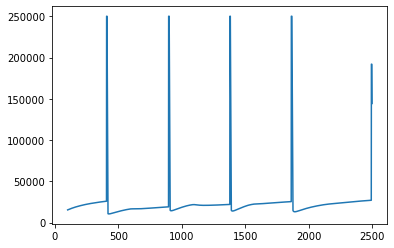

In [20]:
df3['MOX1(Ohms)'][100:2500].plot.line()

In [21]:
no = pd.read_csv(r"Sharanya_NO2", header=0, sep=",")

x = no["Time(sec)"]
y = no["MOX1(Ohms)"]
slope_intercept = np.polyfit(x,y,1)

print(slope_intercept)

[  231.00116054 10860.54850083]


## SO2 gas  

In [13]:
ffolder4 = []
c= 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
      fname =  os.path.join(subdir, file)
      if (('SO2' in fname) or ('so2' in fname)) and (fname.endswith('MOX.csv')) and ('NO2' not in file) and ('2nd' not in fname) and ('clean' not in fname) and ('purge' not in fname) and ('Purge' not in fname) and ('Clean' not in fname):
        
        ffolder4.append(fname)
        c += 1

In [14]:
df = pd.concat(map(pd.read_csv, ffolder4), ignore_index=True)
df.to_csv('Sharanya_SO2')

In [15]:
df4=pd.read_csv(r'Sharanya_SO2')
df4.shape

(124104, 13)

<AxesSubplot:>

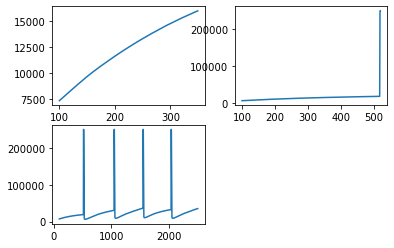

In [25]:
plt.subplot(2, 2, 1)
df4['MOX1(Ohms)'][100:350].plot.line()
plt.subplot(2, 2, 2)
df4['MOX1(Ohms)'][100:520].plot.line()
plt.subplot(2, 2, 3)
df4['MOX1(Ohms)'][100:2500].plot.line()

<AxesSubplot:>

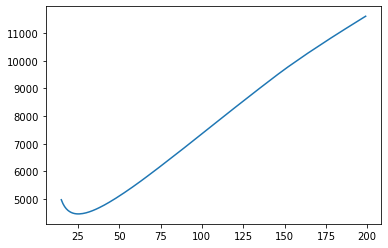

In [27]:
df4['MOX1(Ohms)'][15:200].plot.line()

<AxesSubplot:>

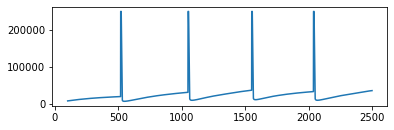

In [27]:
plt.subplot(2, 1, 1)
df4['MOX1(Ohms)'][100:2500].plot.line()

In [99]:
so = pd.read_csv(r"Sharanya_SO2", header=0, sep=",")

x = so["Time(sec)"]
y = so["MOX1(Ohms)"]
slope_intercept = np.polyfit(x,y,1)
print(slope_intercept)

[  249.71764139 53098.2801626 ]


In [ ]:
Identify the feature in which gas is harmful

## CH4 sign

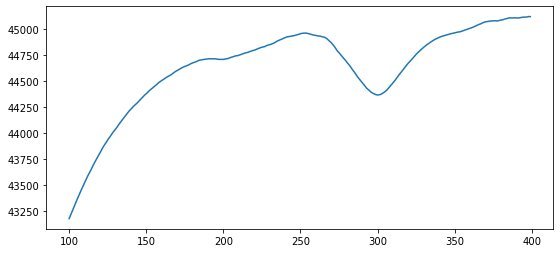

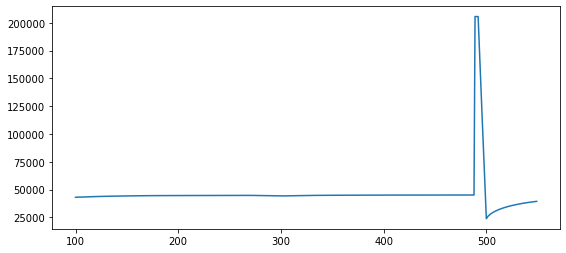

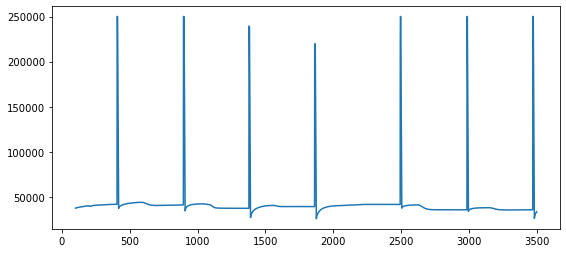

In [53]:
df1=pd.read_csv(r'Sharanya_CH4')
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 1)
df1['MOX3(Ohms)'][100:400].plot.line()
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 2)
df1['MOX3(Ohms)'][100:550].plot.line()
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 3)
df2['MOX3(Ohms)'][100:3500].plot.line()

## H2S sign

<AxesSubplot:>

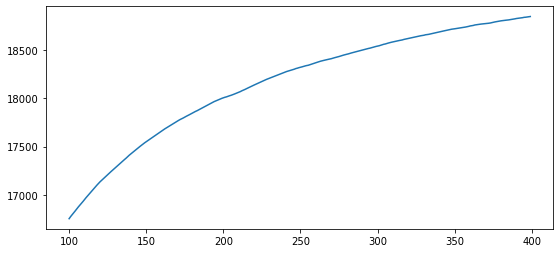

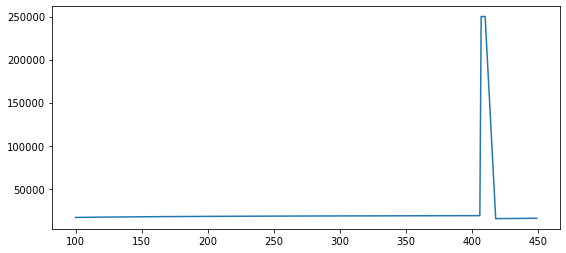

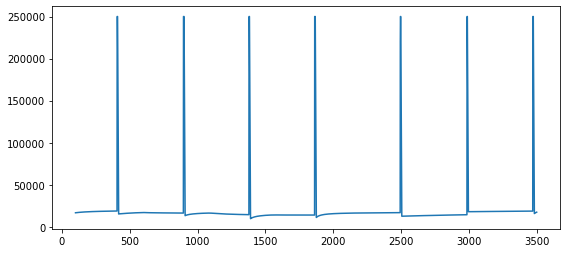

In [51]:
df2=pd.read_csv(r'Sharanya_H2S')
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 1)
df2['MOX4(Ohms)'][100:400].plot.line()
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 2)
df2['MOX4(Ohms)'][100:450].plot.line()
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 3)
df2['MOX4(Ohms)'][100:3500].plot.line()

## So2 sign

<AxesSubplot:>

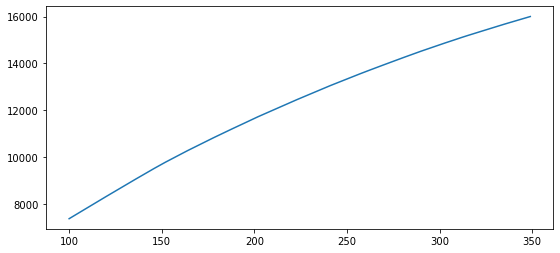

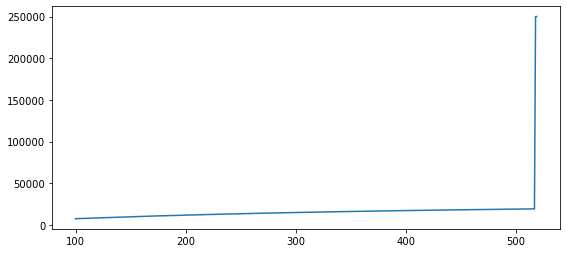

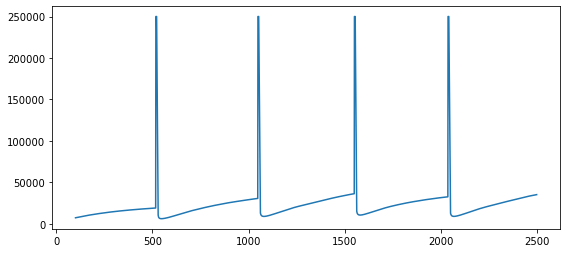

In [50]:
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 1)
df4['MOX1(Ohms)'][100:350].plot.line()
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 2)
df4['MOX1(Ohms)'][100:520].plot.line()
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 3)
df4['MOX1(Ohms)'][100:2500].plot.line()

## No2 sign 

<AxesSubplot:>

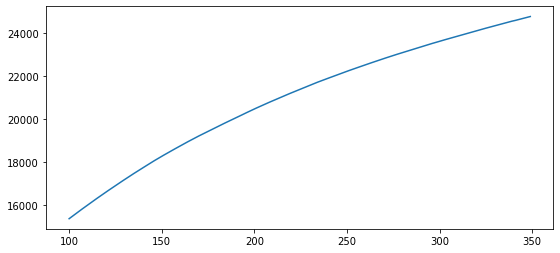

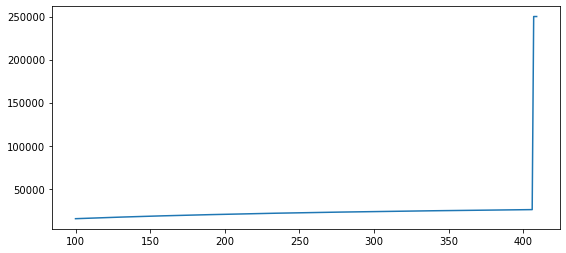

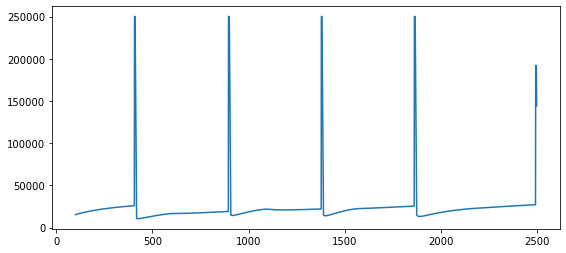

In [49]:
df3=pd.read_csv(r'Sharanya_NO2')
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 1)
df3['MOX1(Ohms)'][100:350].plot.line()
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 2)
df3['MOX1(Ohms)'][100:410].plot.line()
plt.figure(figsize=(20,9))
plt.subplot(2, 2, 3)
df3['MOX1(Ohms)'][100:2500].plot.line()

## Model building 

In [38]:
df1=pd.read_csv(r'Sharanya_CH4')
df1["Gas"] = "CH4"

(54438, 14)

In [35]:
df2=pd.read_csv(r'Sharanya_H2S')
df2["Gas"] = "H2S"
df2.head()

,Unnamed: 0,Time(sec),UH1 Vtg(V),MOX1(Ohms),UH2 Vtg(V),MOX2(Ohms),UH3 Vtg(V),MOX3(Ohms),UH4 Vtg(V),MOX4(Ohms),Ambient Temperature(degC),Ambient Humdity(%%),Ambient Pressure(hPa),Gas
0,0,0.0,0.00,250000.0,0,250000,0.00,185894.4,0.00,250000.0,25.5,57.4,759.9,H2S
1,1,0.5,1.88,250000.0,1,250000,2.82,185894.8,2.02,250000.0,25.5,57.4,759.9,H2S
2,2,1.0,1.88,250000.0,1,250000,2.82,185883.7,2.02,250000.0,25.5,57.4,759.9,H2S
3,3,1.5,1.88,250000.0,1,250000,2.82,185890.2,2.02,250000.0,25.5,57.4,759.9,H2S
4,4,2.0,1.88,250000.0,1,250000,2.82,185898.5,2.02,250000.0,25.5,57.4,759.9,H2S


In [51]:
df3=pd.read_csv(r'Sharanya_NO2')
df3["Gas"] = "NO2"
df3.head()

,Unnamed: 0,Time(sec),UH1 Vtg(V),MOX1(Ohms),UH2 Vtg(V),MOX2(Ohms),UH3 Vtg(V),MOX3(Ohms),UH4 Vtg(V),MOX4(Ohms),Ambient Temperature(degC),Ambient Humdity(%%),Ambient Pressure(hPa),Gas
0,0,0.0,0.00,250000.0,0,250000,0.00,185894.4,0.00,250000.0,25.5,57.4,759.9,NO2
1,1,0.5,1.88,250000.0,1,250000,2.82,185894.8,2.02,250000.0,25.5,57.4,759.9,NO2
2,2,1.0,1.88,250000.0,1,250000,2.82,185883.7,2.02,250000.0,25.5,57.4,759.9,NO2
3,3,1.5,1.88,250000.0,1,250000,2.82,185890.2,2.02,250000.0,25.5,57.4,759.9,NO2
4,4,2.0,1.88,250000.0,1,250000,2.82,185898.5,2.02,250000.0,25.5,57.4,759.9,NO2


In [37]:
df4=pd.read_csv(r'Sharanya_SO2')
df4["Gas"] = "SO2"
df4.head()

,Unnamed: 0,Time(sec),UH1 Vtg(V),MOX1(Ohms),UH2 Vtg(V),MOX2(Ohms),UH3 Vtg(V),MOX3(Ohms),UH4 Vtg(V),MOX4(Ohms),Ambient Temperature(degC),Ambient Humdity(%%),Ambient Pressure(hPa),Gas
0,0,0.0,0.00,250000.0,0,250000,0.00,250000.0,0.00,250000.0,23.4,46.7,759.9,SO2
1,1,0.5,1.88,250000.0,1,250000,2.82,250000.0,2.02,250000.0,23.5,46.7,759.9,SO2
2,2,1.0,1.88,250000.0,1,250000,2.82,250000.0,2.02,250000.0,23.5,46.7,759.9,SO2
3,3,1.5,1.88,250000.0,1,250000,2.82,250000.0,2.02,250000.0,23.5,46.7,759.9,SO2
4,4,2.0,1.88,250000.0,1,250000,2.82,250000.0,2.02,250000.0,23.4,46.8,759.9,SO2


## Try and Error 

In [ ]:
#Equation formation By auto Regression

In [141]:
from statsmodels.tsa.ar_model import AutoReg

In [222]:
df1=pd.read_csv(r'Sharanya_CH4', parse_dates=True)
df11=df1[['Time(sec)','MOX3(Ohms)']]
df_filled = df11.fillna(method='ffill')
#train_data = df_filled[0:40278]
#test_data = df_filled[40279:54438]
train_data = df_filled[1:len(df_filled)-10000]
test_data = df_filled[len(df_filled)-10000:]

In [247]:
model = AutoReg(list(train_data['MOX3(Ohms)']), lags=10)
result = model.fit()
predictions = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

In [195]:
result

In [248]:
coefficients = result.params

# Interpret the coefficients to get the equation of the pattern
equation = f'y(t) = {coefficients[0]:.2f} + '
for i, coef in enumerate(coefficients[1:]):
    equation += f'{coef:.2f} * y(t-{i+1}) + '
equation = equation[:-3] 

print('Equation of the pattern:', equation)

Equation of the pattern: y(t) = 3929.69 + 1.03 * y(t-1) + -0.01 * y(t-2) + -0.01 * y(t-3) + -0.04 * y(t-4) + -0.08 * y(t-5) + 0.00 * y(t-6) + -0.00 * y(t-7) + -0.01 * y(t-8) + -0.00 * y(t-9) + 0.03 * y(t-10)


In [238]:
model = AutoReg(list(train_data['MOX3(Ohms)']), lags=9)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(list(train_data['MOX3(Ohms)'])), end=len(list(train_data['MOX3(Ohms)']))+len(list(test_data['MOX3(Ohms)']))-1, dynamic=False)
predictions

Coefficients: [ 4.06881365e+03  1.02918827e+00 -6.70426448e-03 -8.25080399e-03
 -4.39092623e-02 -8.60104049e-02  9.27279462e-04 -4.07386832e-03
 -1.03088947e-02  3.37550524e-02]


array([19333.86038296, 21871.11217672, 24462.77416592, ...,
       42655.89710493, 42655.89710493, 42655.89710493])

In [ ]:
#MAE

In [226]:
a=(predictions-list(test_data['MOX3(Ohms)']))
m=a.mean()

In [227]:
abs(a/m)

array([0.12847361, 0.24795886, 0.35924952, ..., 0.7918295 , 0.7917746 ,
       0.79156468])

In [228]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [229]:
test_values=list(test_data['MOX3(Ohms)'])

In [236]:
print(mean_absolute_error(test_values, predictions))

16710.451593351358


In [237]:
print(mean_squared_error(test_values, predictions))

493962345.4154146


In [ ]:
# Linear and Regression

In [252]:
for i in df11:
    print(i)

Time(sec)
MOX3(Ohms)


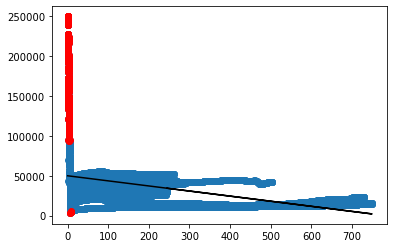

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# load the dataset
data = df11

# split the data into X and y
X = data['Time(sec)'].values.reshape(-1, 1)
y = data['MOX3(Ohms)'].values

# fit a linear regression model to the data
model = LinearRegression().fit(X, y)

# calculate the residuals of the model
residuals = y - model.predict(X)

# identify any residuals that are greater than 2 standard deviations from the mean
irregularities = np.abs(residuals) > 2 * np.std(residuals)

# plot the data with irregularities highlighted in red
plt.scatter(X, y)
plt.scatter(X[irregularities], y[irregularities], color='red')
plt.plot(X, model.predict(X), color='black')
plt.show()


In [264]:
threshold

69440.92232923569

In [7]:
df1=pd.read_csv(r'Sharanya_CH4')
df11=df1[['MOX3(Ohms)','Time(sec)']][0:400]


In [8]:
data = df11


In [8]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

<AxesSubplot:>

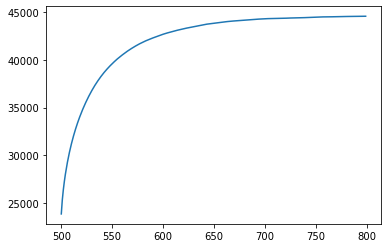

In [11]:
df1['MOX3(Ohms)'][500:800].plot.line()

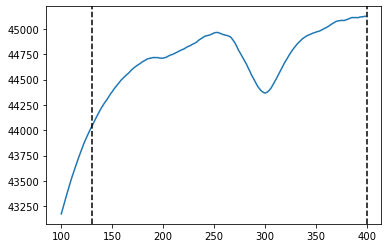

In [9]:
algo=rpt.Pelt(model='rbf').fit(df1['MOX3(Ohms)'][0:400].values)
result=algo.predict(pen=50)#Penalty prevents from overfitting the model
a=df1['MOX3(Ohms)'][100:400].plot.line()
for i in result:
    a.axvline(x=i,color='k',linestyle='--')

In [72]:
#Binary segmentation

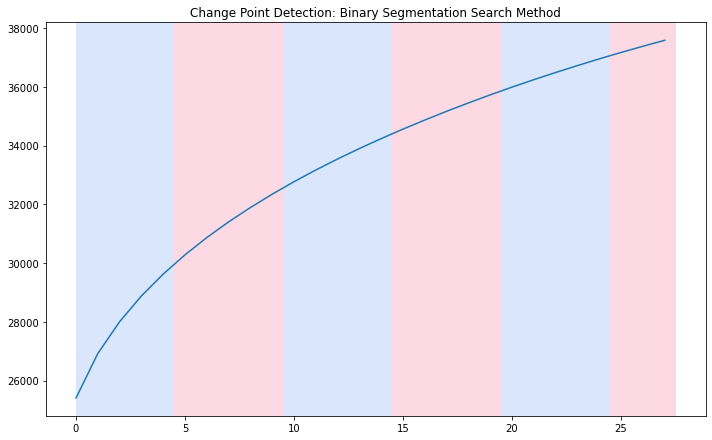

In [84]:
points=np.array(df1['MOX3(Ohms)'][12:40])
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=5)

rpt.show.display(points, my_bkps, figsize=(10,6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

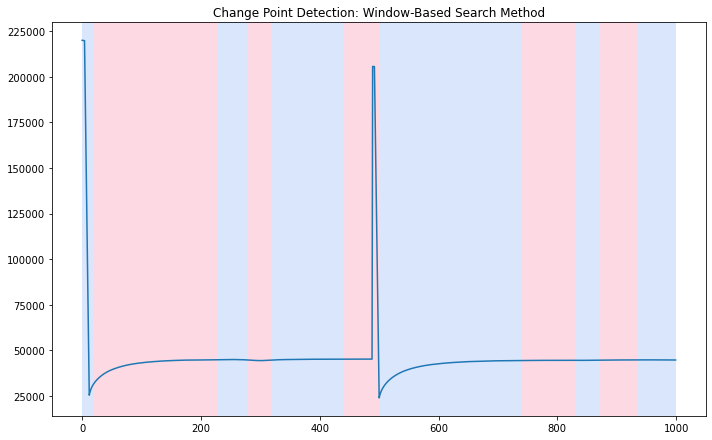

In [14]:
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()

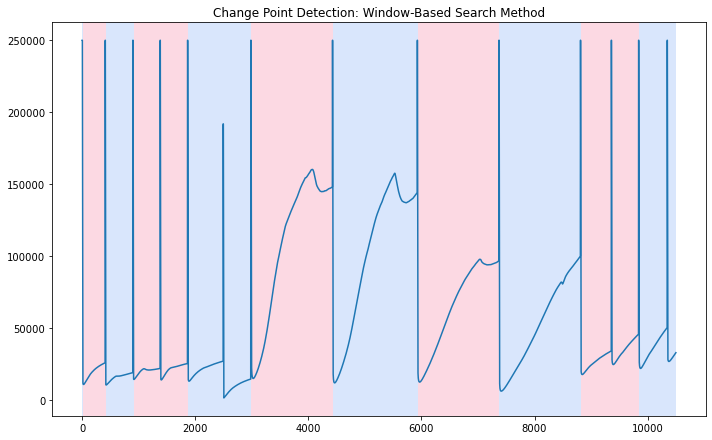

In [70]:
points=np.array(df3['MOX1(Ohms)'][0:10500])
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)# breakpoints are the indices in the time series where the underlying data-generating process changes significantly.
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()